In [1]:
import pandas as pd
from sodapy import Socrata
#aqui sacamos las tablas de datos de hospitales y desfibriladores 
client = Socrata("analisi.transparenciacatalunya.cat", None)

#descargar datos, todos
desfibriladors = client.get_all("wpud-ukyg")
hospitales = client.get_all("8gmd-gz7i")

#pasar a data frame
df_desfibriladors = pd.DataFrame.from_records(desfibriladors) 
df_hospitales = pd.DataFrame.from_records(hospitales) 


#censo es un url i no idescat normal
url = "https://www.idescat.cat/serveis/consultes/ca/censph_10_mun_2024.csv"

df_cens = pd.read_csv(url, sep=";", encoding="utf-8")
df_cens.head()

df_desfibriladors

C:\Users\Ale\AppData\Local\Temp\ipykernel_4340\3449850999.py:18: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cens = pd.read_csv(url, sep=";", encoding="utf-8")


,numero_inscripcio,fabricant,marca_model,numero_serie,vehicle,nom_centre,tipus_via,nom_via,numero_via,espai_fisic,...,hora_fi_11,dia_13,hora_inici_13,hora_fi_13,hora_inici_12,hora_fi_12,dia_12,dia_14,hora_inici_14,hora_fi_14
0,2594,Altre fabricant,Altre Marca/Model Altre fabricant,4355424,No,AJUNTAMENT D'EL FAR D'EMPORDÀ,Passeig,PAU CASALS,SN,VIA PÚBLICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8425,Altre fabricant,Altre Marca/Model Altre fabricant,16E00020755,No,AJUNTAMENT DE LA TORRE DE CAPDELLA,Plaça,DE L'AJUNTAMENT,1,Exterior,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11072,Cardiac Science,Powerheart G5,D00000163591,No,Henkel,Carrer,Nord,5,Entrada empleats,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3430,Altre fabricant,Altre Marca/Model Altre fabricant,13D00805511,No,"NOA VISUAL GROUP, SL",Avinguda,Marti Alsina,2,Despatx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3990,Altre fabricant,Altre Marca/Model Altre fabricant,C14I-00898,No,"AENA SME, S.A.",Edifici,T1 - DIQUER SUR- P10 PORTA 10,S/N,T1-P30(EMBARQUES NORTE) PARED IS-734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11475,14579,HeartSine Technologies Ltd,HeartSine Connected samaritan PAD 350P,23D90006017B23,No,Castellers de Lleida,Carrer,Nou,12,Entrada oficina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11476,13767,HeartSine Technologies Ltd,HeartSine Connected samaritan PAD 350P,23D90019890B23,No,Residència Terraferma,Partida,Grao,0,Al passadís de la planta baixa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11477,15867,HeartSine Technologies Ltd,HeartSine Connected samaritan PAD 350P,22D91148217F22,No,Residència Sant Salvador de l'HortaResidència ...,Carrer,de les Argiles,44,Ubicat a la recepció de la residència,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11478,9991,Altre fabricant,Altre Marca/Model Altre fabricant,18D00025550,No,EDIFICI AJUNTAMENT ELS ALAMÚS,Plaça,DE LA CREU,1,FAÇANA DE L'AJUNTAMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#limpieza y filtro de algunas cosas, por categoria de los hospitales.
df_clean=df_hospitales[df_hospitales["categoria"].str.contains("salut", na=False)]
df_clean = df_clean[["poblacio"]].copy()
df_clean["municipi"] = df_clean["poblacio"].str.upper().str.strip()
df_hospis = df_clean.groupby("municipi").size().reset_index(name="hosp_count")
df_hospis

,municipi,hosp_count
0,AMPOSTA,3
1,BADALONA,3
2,BADIA DEL VALLÈS,1
3,BALAGUER,1
4,BARCELONA,33
5,BERGA,3
6,BLANES,2
7,CALELLA,2
8,"CASTELL D'ARO,PLATJA D'ARO I S'AGARÓ",2
9,CASTELLDEFELS,2


In [42]:

# Filter rows where edat == "total"
df_cens_total = df_cens[(df_cens["edat"] == "total") & (df_cens["sexe"] == "total")].copy()
df_cens_total = df_cens_total[df_cens_total["valor"] <= 5000000]
df_cens_total = df_cens_total.reset_index(drop=True)
df_cens_total = df_cens_total.rename(columns={"valor": "pob"})

# Keep only municipality name and population
df_cens_pop = df_cens_total[["municipi", "pob"]].copy()

# Clean municipality names for merging
df_cens_pop["municipi"] = df_cens_pop["municipi"].str.upper().str.strip()
df_cens_pop

,municipi,pob
0,ABELLA DE LA CONCA,161
1,ABRERA,12981
2,ÀGER,608
3,AGRAMUNT,5592
4,AGUILAR DE SEGARRA,291
...,...,...
942,VINAIXA,449
943,VINEBRE,426
944,VINYOLS I ELS ARCS,2425
945,VIVER I SERRATEIX,173


In [58]:
#poner los municipios bien y contar cuantos desfibriladores tenemos
df_desfibriladors["municipi"] = df_desfibriladors["municipi"].str.upper().str.strip()
df_d_counts = df_desfibriladors.groupby("municipi").size().reset_index(name="desf_count")


#juntar ambas cosas
df_merged = df_d_counts.merge(
    df_cens_pop[["municipi", "pob"]],
    left_on="municipi",
    right_on="municipi",
    how="left"
)

df_merged["desf_per_1000"] = df_merged["desf_count"] / df_merged["pob"] * 1000
df_merged

,municipi,desf_count,pob,desf_per_1000
0,ABRERA,43,12981,3.312534
1,AGRAMUNT,6,5592,1.072961
2,AGULLANA,3,910,3.296703
3,AIGUAFREDA,4,2582,1.549187
4,AIGUAMÚRCIA,1,965,1.036269
...,...,...,...,...
824,VINYOLS I ELS ARCS,3,2425,1.237113
825,VIVER I SERRATEIX,1,173,5.780347
826,XERTA,4,1153,3.469211
827,ÀGER,4,608,6.578947


In [59]:
#ahora voy a limpiar los datos, empiezo con desfibriladores
import geopandas as gpd
import matplotlib.pyplot as plt


#de los datos de cartografia, cogemos los que nos interesan
data_dir = "carto/"

municipis = gpd.read_file(data_dir + "muni.json")

#municipis.plot(figsize=(8, 8), edgecolor="black")
print(municipis.columns)


#plt.show()


Index(['CODIMUNI', 'NOMMUNI', 'CAPMUNI', 'AREAM5000', 'CODICOMAR', 'NOMCOMAR',
       'CAPCOMAR', 'CODIVEGUE', 'NOMVEGUE', 'CAPVEGUE', 'CODIPROV', 'NOMPROV',
       'CAPPROV', 'geometry'],
      dtype='object')


In [81]:
#juntamos los terminos municipios del censo con los desfibriladores

municipis["NOMMUNI"] = municipis["NOMMUNI"].str.upper().str.strip()

des_muni = municipis.merge(
    df_merged[["municipi", "desf_per_1000", "desf_count", "pob"]],
    left_on="NOMMUNI",
    right_on="municipi",
    how="left"
)

des_muni["desf_per_1000"] = des_muni["desf_per_1000"].fillna(0)
des_muni["desf_count"] = des_muni["desf_count"].fillna(0)
des_muni

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry,municipi,desf_per_1000,desf_count,pob
0,080018,ABRERA,Abrera,19.9781,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((1.92486 41.53663, 1.92197 41.5...",ABRERA,3.312534,43.0,12981.0
1,080023,AGUILAR DE SEGARRA,Aguilar de Segarra,43.2198,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"MULTIPOLYGON (((1.61829 41.76885, 1.61278 41.7...",NaN,0.000000,0.0,NaN
2,080039,ALELLA,Alella,9.6346,21,Maresme,Mataró,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.28512 41.51534, 2.28501 41.5...",ALELLA,1.274510,13.0,10200.0
3,080044,ALPENS,Alpens,13.7788,43,Lluçanès,Prats de Lluçanès,07,Catalunya Central,*,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.09411 42.14192, 2.09031 42.1...",ALPENS,3.703704,1.0,270.0
4,080057,L'AMETLLA DEL VALLÈS,l'Ametlla del Vallès,14.0885,41,Vallès Oriental,Granollers,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.24126 41.70273, 2.24178 41.7...",NaN,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,439039,CAMARLES,Camarles,30.0157,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"MULTIPOLYGON (((0.64239 40.82154, 0.64239 40.8...",CAMARLES,0.583431,2.0,3428.0
943,439044,L'ALDEA,l'Aldea,30.4743,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"MULTIPOLYGON (((0.60964 40.80699, 0.60855 40.8...",NaN,0.000000,0.0,NaN
944,439057,SALOU,Salou,15.1248,36,Tarragonès,Tarragona,04,Camp de Tarragona,Tarragona,43,Tarragona,Tarragona,"MULTIPOLYGON (((1.13671 41.09788, 1.13391 41.1...",SALOU,1.445372,44.0,30442.0
945,439060,L'AMPOLLA,l'Ampolla,35.6196,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"MULTIPOLYGON (((0.69184 40.85044, 0.69102 40.8...",NaN,0.000000,0.0,NaN


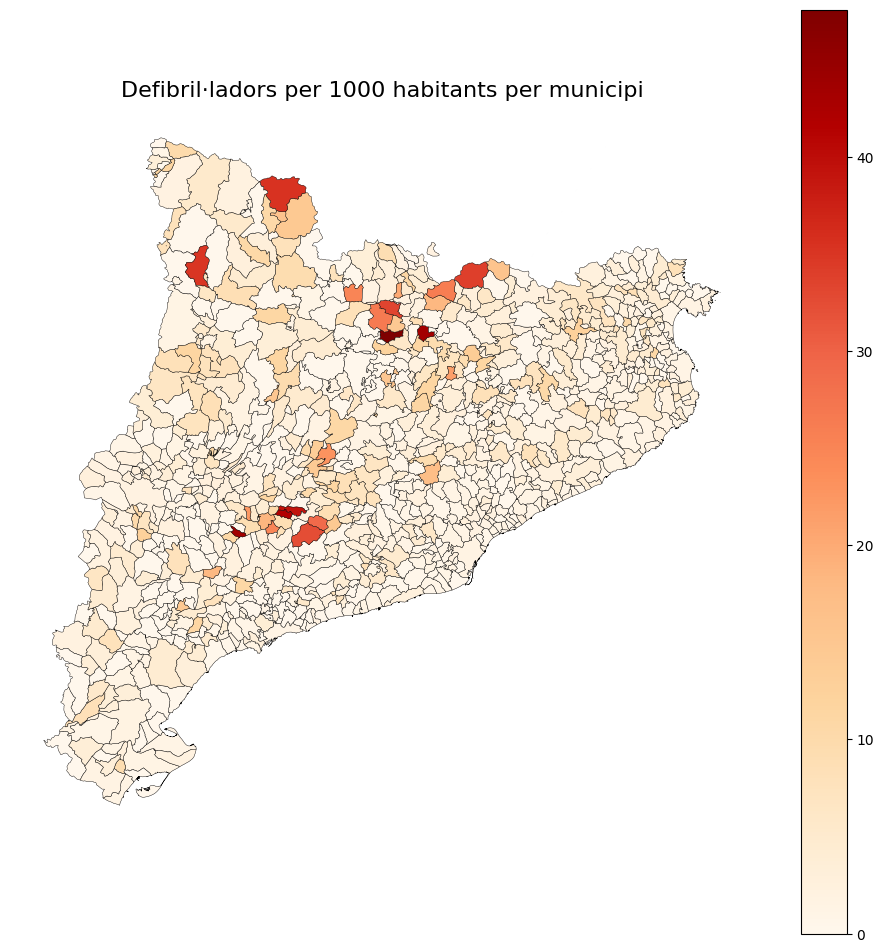

In [71]:
#ploteamos las cosas que tenemos: basicament un mapa (gpd) con sus valores por municipio
fig, ax = plt.subplots(figsize=(12, 12))

des_muni.plot(
    column="desf_per_1000",
    ax=ax,
    legend=True,
    cmap="OrRd",
    edgecolor="black",
    linewidth=0.3
)

ax.set_title("Defibril·ladors per 1000 habitants per municipi", fontsize=16)
ax.axis("off")
plt.show()

In [102]:
#añadimos los hospitales y contamos cuantos hay. Luego normalizamos por poblacion
des_muni_hospi = des_muni.merge(
    df_hospis[["municipi", "hosp_count"]],
    left_on="NOMMUNI",
    right_on="municipi",
    how="left"
)

des_muni_hospi["hosp_count"] = des_muni_hospi["hosp_count"].fillna(0)
des_muni_hospi["desf_hosp"] = (des_muni_hospi["hosp_count"] + des_muni_hospi["desf_count"])/des_muni_hospi["pob"]*1000
des_muni_hospi["desf_hosp"] = des_muni_hospi["desf_hosp"].fillna(0)
des_muni_hospi

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,...,NOMPROV,CAPPROV,geometry,municipi_x,desf_per_1000,desf_count,pob,municipi_y,hosp_count,desf_hosp
0,080018,ABRERA,Abrera,19.9781,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,...,Barcelona,Barcelona,"MULTIPOLYGON (((1.92486 41.53663, 1.92197 41.5...",ABRERA,3.312534,43.0,12981.0,NaN,0.0,3.312534
1,080023,AGUILAR DE SEGARRA,Aguilar de Segarra,43.2198,07,Bages,Manresa,07,Catalunya Central,*,...,Barcelona,Barcelona,"MULTIPOLYGON (((1.61829 41.76885, 1.61278 41.7...",NaN,0.000000,0.0,NaN,NaN,0.0,0.000000
2,080039,ALELLA,Alella,9.6346,21,Maresme,Mataró,01,Barcelona,Barcelona,...,Barcelona,Barcelona,"MULTIPOLYGON (((2.28512 41.51534, 2.28501 41.5...",ALELLA,1.274510,13.0,10200.0,NaN,0.0,1.274510
3,080044,ALPENS,Alpens,13.7788,43,Lluçanès,Prats de Lluçanès,07,Catalunya Central,*,...,Barcelona,Barcelona,"MULTIPOLYGON (((2.09411 42.14192, 2.09031 42.1...",ALPENS,3.703704,1.0,270.0,NaN,0.0,3.703704
4,080057,L'AMETLLA DEL VALLÈS,l'Ametlla del Vallès,14.0885,41,Vallès Oriental,Granollers,01,Barcelona,Barcelona,...,Barcelona,Barcelona,"MULTIPOLYGON (((2.24126 41.70273, 2.24178 41.7...",NaN,0.000000,0.0,NaN,NaN,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,439039,CAMARLES,Camarles,30.0157,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,...,Tarragona,Tarragona,"MULTIPOLYGON (((0.64239 40.82154, 0.64239 40.8...",CAMARLES,0.583431,2.0,3428.0,NaN,0.0,0.583431
943,439044,L'ALDEA,l'Aldea,30.4743,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,...,Tarragona,Tarragona,"MULTIPOLYGON (((0.60964 40.80699, 0.60855 40.8...",NaN,0.000000,0.0,NaN,NaN,0.0,0.000000
944,439057,SALOU,Salou,15.1248,36,Tarragonès,Tarragona,04,Camp de Tarragona,Tarragona,...,Tarragona,Tarragona,"MULTIPOLYGON (((1.13671 41.09788, 1.13391 41.1...",SALOU,1.445372,44.0,30442.0,NaN,0.0,1.445372
945,439060,L'AMPOLLA,l'Ampolla,35.6196,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,...,Tarragona,Tarragona,"MULTIPOLYGON (((0.69184 40.85044, 0.69102 40.8...",NaN,0.000000,0.0,NaN,NaN,0.0,0.000000


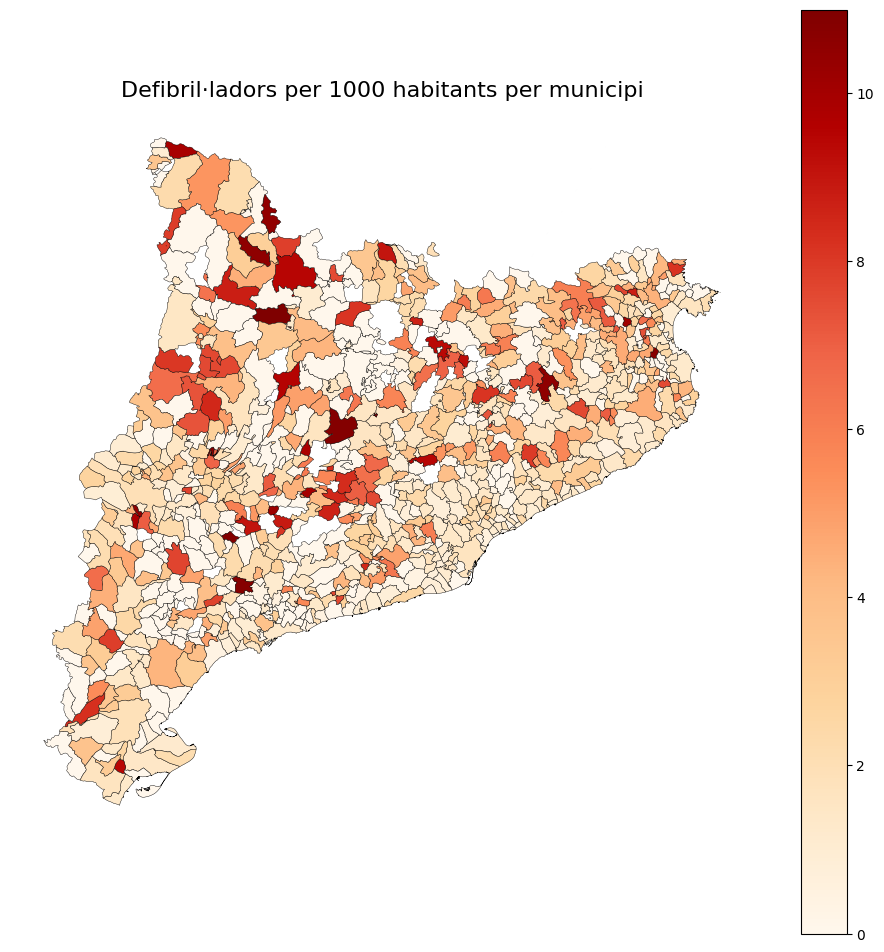

In [108]:
#Mismo plot pero para hospitales i desfis
fig, ax = plt.subplots(figsize=(12, 12))

# Compute the 95th percentile
threshold = des_muni_hospi["desf_hosp"].quantile(0.95)

# Keep only values below or equal to the 95th percentile
des_poc = des_muni_hospi[des_muni_hospi["desf_hosp"] <= threshold]

des_poc.plot(
    column="desf_hosp",
    ax=ax,
    legend=True,
    cmap="OrRd",
    edgecolor="black",
    linewidth=0.3
)

ax.set_title("Defibril·ladors per 1000 habitants per municipi", fontsize=16)
ax.axis("off")
plt.show()